# AI - Analyzer

In [1]:
import pandas as pd
import json

# Path to the JSON file
json_file_path = '../data/transcriptions (3).json'

# Load the JSON data
with open(json_file_path, 'r') as file:
    data = json.load(file)

# Extract the "data" list which contains the records starting from "id"
records = data[2]['data']

# Convert the list of records into a DataFrame
df = pd.DataFrame(records)

# Display the DataFrame
df.head()


,id,processingdate,transcription,summary
0,18531,2024-09-24 13:44:12,"Goedemiddag, dit is natuurlijk helemaal Hendri...",Sta Bosma van Barbara Bosma belde met een tech...
1,18526,2024-09-24 13:18:10,"Goedemiddag, Michel. Hey, Michael met Carla VW...",Carla van VW Elektro Service belde Michael Kes...
2,18522,2024-09-24 13:08:11,"Hitler van Mikoell. Hallo, Miko. Goed. Mijn na...",Olivia van Akstal heeft contact opgenomen om i...
3,18509,2024-09-24 11:54:31,"Met Peter Fritswijk. Dag Peter met Gerwinant, ...",Gerwinant van 10Telecom had een gesprek met Pe...
4,18498,2024-09-24 11:24:16,"Ik vind het wel mooi van. Dag, goedendag. Met ...",Richard van de Zwalspetje belde met Hendrik St...


In [2]:
df.tail()

,id,processingdate,transcription,summary
2774,5,2024-03-22 10:52:25,"Een, twee, drie, vier, vijf. 1, 2, 3, 4, 5. Ha...",Er is geen relevante informatie voor een samen...
2775,4,2024-03-22 10:51:43,"Goedemorgen, wilkom Henrik. Hallo, Adfica doe ...",Henrik heeft gebeld over de migratie van telef...
2776,3,2024-03-22 10:51:29,"Toets dan een 1, laat uw ordennummer achter en...",Ik sta klaar om je te helpen zodra je een gesp...
2777,2,2024-03-22 10:43:46,Al onze medewerkers zijn nog in gesprek. We vr...,Douwe Opperkamp heeft teruggebeld naar 10Telec...
2778,1,2024-03-22 10:41:03,Bedankt voor het bellen. Dit is de voicemail v...,Een voicemailbericht van Moreprofit en SalesPr...


In [3]:
# Column names
df.columns

Index(['id', 'processingdate', 'transcription', 'summary'], dtype='object')

In [4]:
df.size

11116

# Explorative Data Analysis (EDA)

 ## 1. Wordcloud of the transcription and summary column without text cleaning

In [5]:
# Importing required libraries
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import json

def generate_wordcloud(df, col_name):
    # Extract the specified column
    col_spec = df[col_name].dropna()
    
    # Combine all entries of the specified column into one text string
    text = " ".join(col_spec)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Display the word cloud using matplotlib
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # No axes for the word cloud
    plt.title(f'Wordcloud of the {col_name} column without text cleaning')
    plt.show()


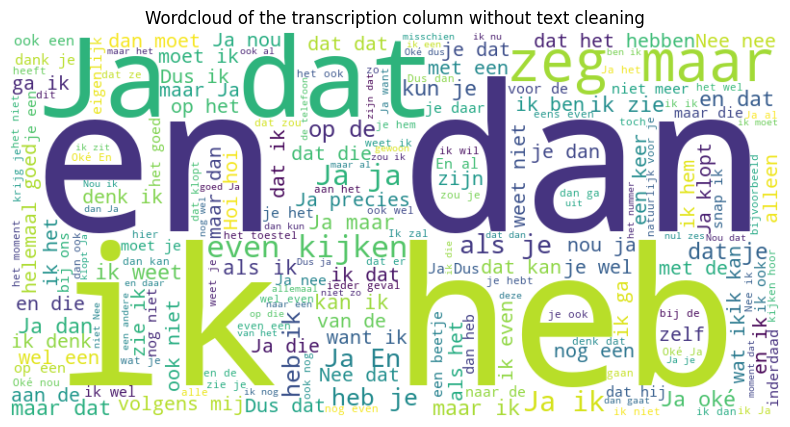

In [7]:
generate_wordcloud(df=df, col_name='transcription')

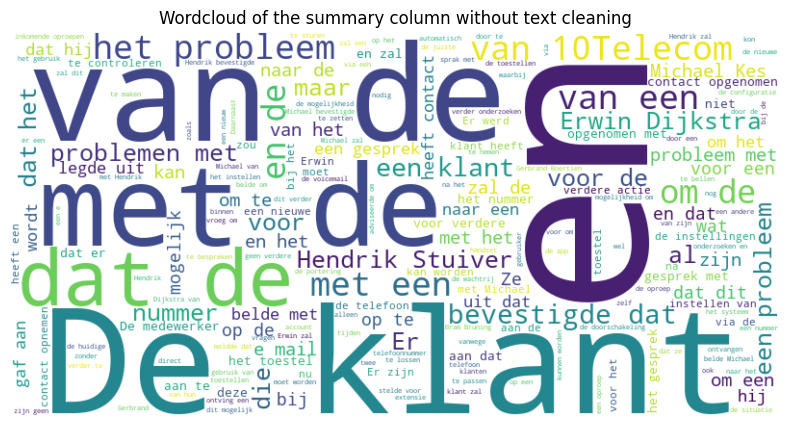

In [6]:
generate_wordcloud(df=df, col_name='summary')

## 2. Wordcloud of the transcription and summary column after text cleaning

In [8]:
# Import necessary libraries
import string
import nltk
from collections import Counter

# Download the Dutch stopwords
# nltk.download('stopwords')
from nltk.corpus import stopwords

# Dutch stopwords list
dutch_stopwords = set(stopwords.words('dutch'))

# Function to clean and preprocess text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and non-alphabetic characters
    text = "".join([char for char in text if char not in string.punctuation])
    # Remove stopwords
    words = text.split()
    words = [word for word in words if word not in dutch_stopwords]
    return " ".join(words)

def generate_clean_wordcloud(df, col_name):
    # Extract the specified column
    col_spec = df[col_name].dropna()
    
    # Clean the specified column
    cleaned_col_name = col_spec.apply(clean_text)
    
    # Combine all the entries of the cleaned column into one text string
    cleaned_text = " ".join(cleaned_col_name)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cleaned_text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Wordcloud of the cleaned {col_name} column')
    plt.axis('off')
    plt.show()



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fredbone/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


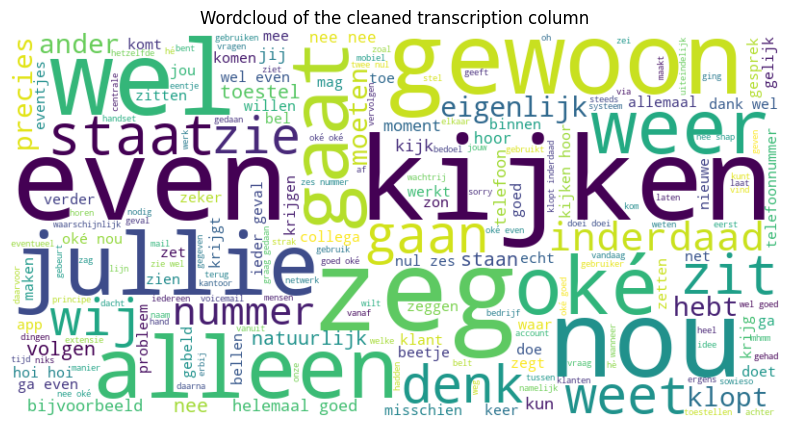

In [9]:
generate_clean_wordcloud(df=df, col_name='transcription')

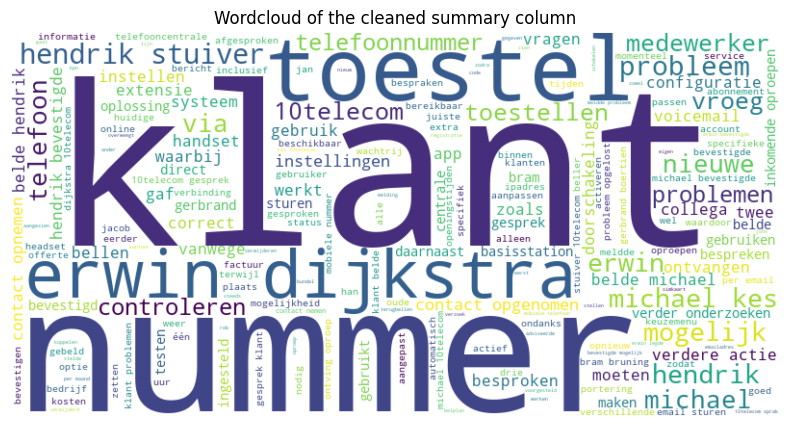

In [10]:
generate_clean_wordcloud(df=df, col_name='summary')

## 3. Top n-Word Frequencies in Cleaned Transcription and Summary Column

In [22]:
from collections import Counter
from nltk import ngrams
import matplotlib.pyplot as plt

def generate_top_n_word_freq(df, col_name, n, k=1):
    # Extract the specified column
    col_spec = df[col_name].dropna()
    
    # Clean the specified column
    cleaned_col_name = col_spec.apply(clean_text)
    
    # Combine all the entries of the cleaned column into one text string
    cleaned_text = " ".join(cleaned_col_name)

    # Split the cleaned text into tokens
    tokens = cleaned_text.split()
    
    # Generate k-grams based on the value of k
    k_grams = ngrams(tokens, k)
    
    # Generate the k-gram frequencies
    k_gram_counts = Counter(k_grams)
    
    # Get the top n most common k-grams
    common_k_grams = k_gram_counts.most_common(n)
    
    # Convert the k-grams (which are tuples) to strings for display
    k_grams_as_strings = [' '.join(gram) for gram in dict(common_k_grams).keys()]
    
    # Split the k-grams and their frequencies for the chart
    k_grams_str, frequencies = zip(*common_k_grams)

    if k==1:
        title = f'Top {n} Word Frequencies in Cleaned {col_name} Column'
    else:
        title = f'Top {n} {k}-gram Frequencies in Cleaned {col_name} Column'
    
    # Generate a bar chart for the k-gram frequencies
    plt.figure(figsize=(10, 6))
    plt.barh(k_grams_as_strings, frequencies, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel(f'{k}-grams')
    plt.title(title)
    plt.gca().invert_yaxis()  # Invert the axis to have the highest frequency at the top
    plt.show()


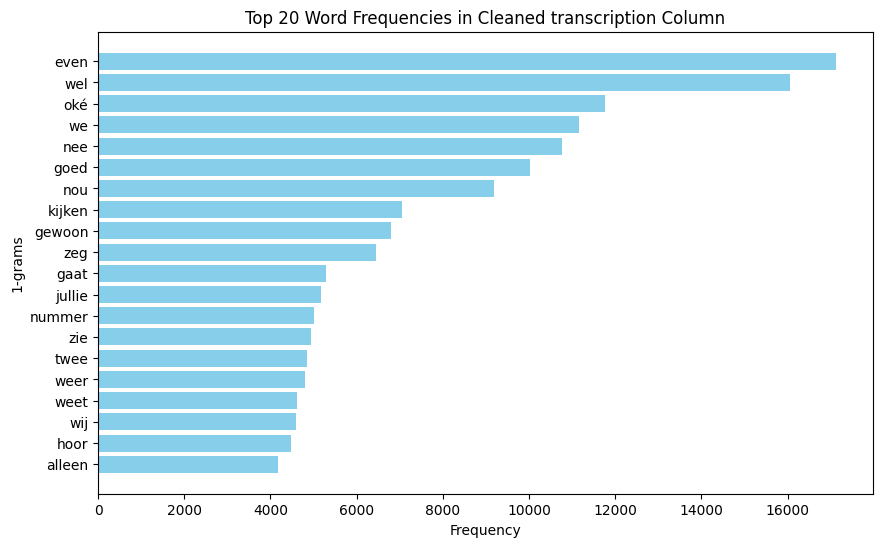

In [23]:
generate_top_n_word_freq(df=df, col_name='transcription', n=20, k=1)

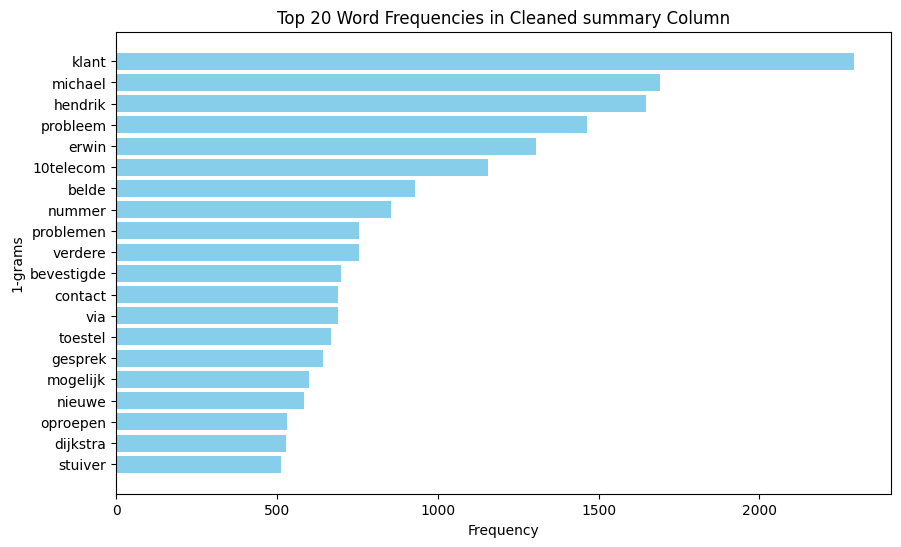

In [24]:
generate_top_n_word_freq(df=df, col_name='summary', n=20, k=1)

Since the focus of our analysis is on the Transcription column, the Summary column won't be part of the following analysis.

## 4. Top n k-gram Frequencies in Cleaned Transcription Column

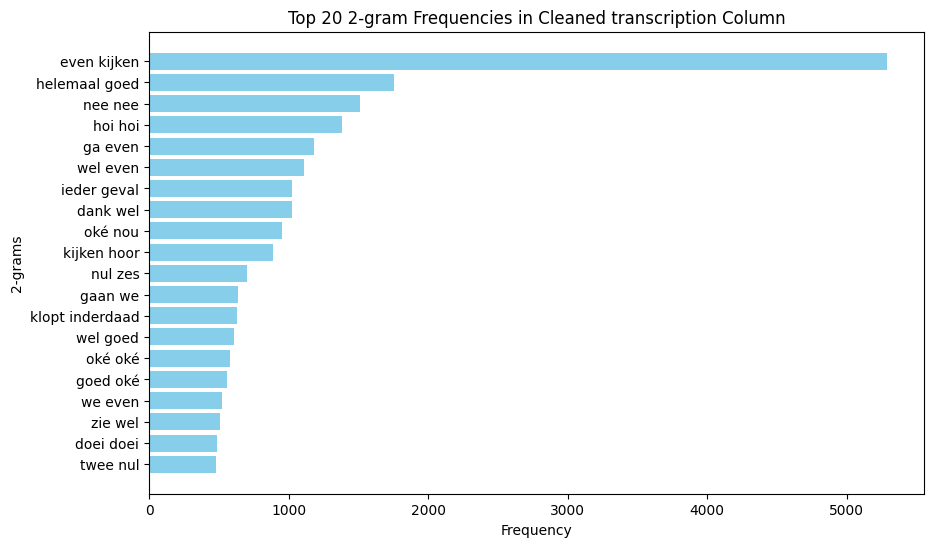

In [26]:
generate_top_n_word_freq(df=df, col_name='transcription', n=20, k=2)

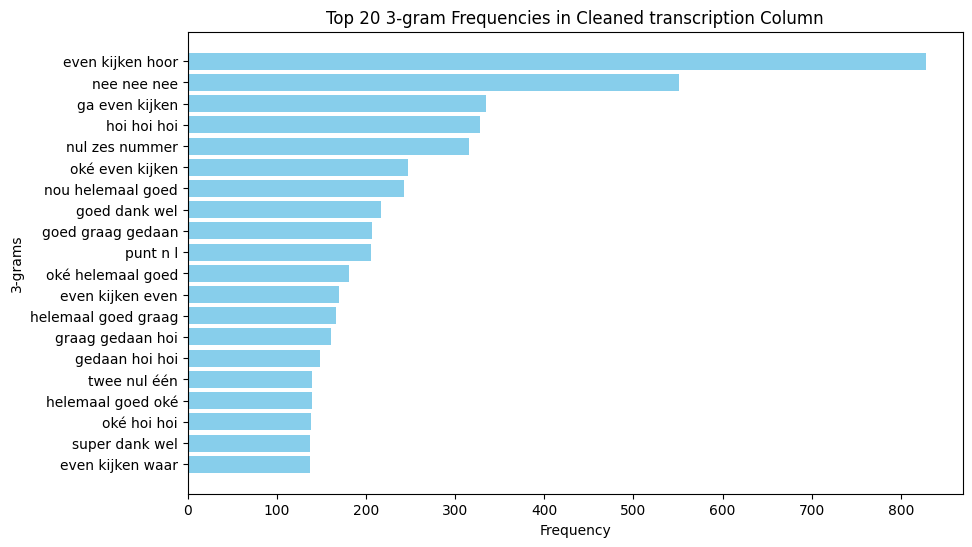

In [27]:
generate_top_n_word_freq(df=df, col_name='transcription', n=20, k=3)

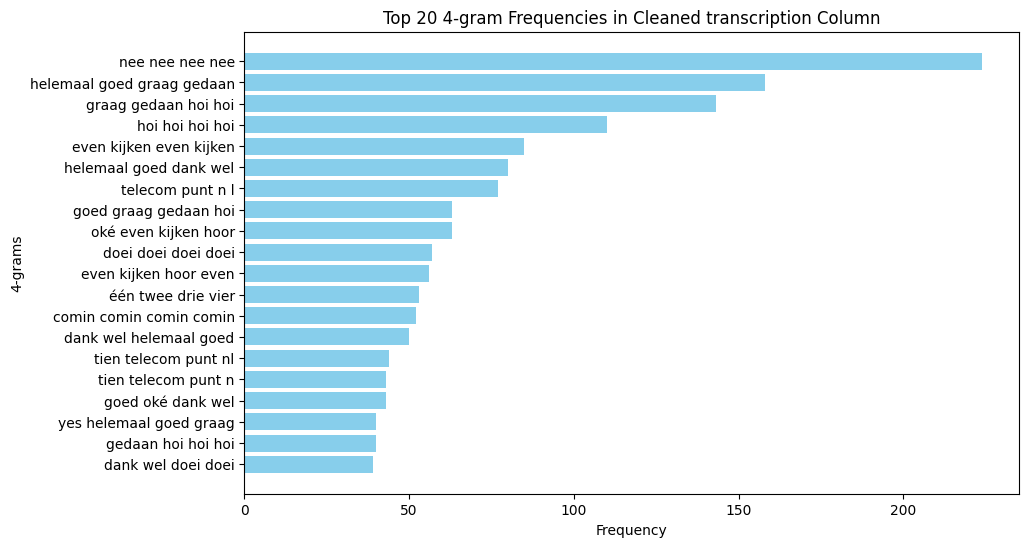

In [28]:
generate_top_n_word_freq(df=df, col_name='transcription', n=20, k=4)